In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import numpy as np
from datetime import date

In [3]:
datasus = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",",engine='python')

In [4]:
datasus.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429933e+09


In [5]:
datasus.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

In [6]:
pd.options.display.float_format = "{:.2f}".format

In [7]:
datasus['Unidade da Federação'] = datasus['Unidade da Federação'].str.replace('\d+.','')

In [8]:
datasus = datasus.set_index('Unidade da Federação')

In [9]:
datasus_T = datasus.T

In [10]:
datasus_T = datasus_T[:-1]

In [11]:
datasus_T = datasus_T.iloc[138:]

In [12]:
datasus_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 2009/Jan to 2020/Ago
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Rondônia             140 non-null    object
 1   Acre                 140 non-null    object
 2   Amazonas             140 non-null    object
 3   Roraima              140 non-null    object
 4   Pará                 140 non-null    object
 5   Amapá                140 non-null    object
 6   Tocantins            140 non-null    object
 7   Maranhão             140 non-null    object
 8   Piauí                140 non-null    object
 9   Ceará                140 non-null    object
 10  Rio Grande do Norte  140 non-null    object
 11  Paraíba              140 non-null    object
 12  Pernambuco           140 non-null    object
 13  Alagoas              140 non-null    object
 14  Sergipe              140 non-null    object
 15  Bahia                140 non-null    object
 16  M

In [13]:
datasus_T = datasus_T.apply(lambda x: x.replace('-','0'))

In [14]:
datasus_T = datasus_T.apply(pd.to_numeric)

In [15]:
datasus_mais_recente = datasus_T.iloc[-1]

In [16]:
datasus_mais_recente_pct = datasus_mais_recente / datasus_mais_recente.sum()

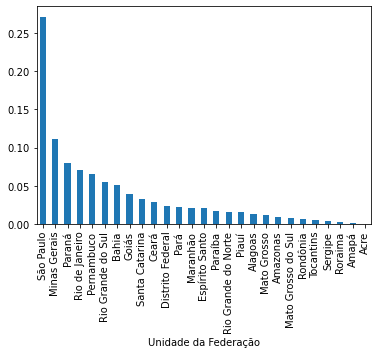

In [17]:
datasus_mais_recente_pct.sort_values(ascending=False).plot(kind='bar')

#### Get population data from IBGE - Wikipedia

In [18]:
def get_data_from_ibge_join_cols(df):
    """ This function gets the population from each state in Brazil from wikipedia 'Lista de unidades federativas do brasil'
    Transform the data and join it with the dataframe passed on."""
    
    col_name = df.name 
    
    ibge = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
    ibge = pd.DataFrame(ibge[0])
    ibge = ibge[['Unidade federativa','População']]
    
    #transformaçao nome Coluna e set do indice
    ibge = ibge.rename(columns={'População':'populacao','Unidade federativa':'uf'})
    ibge['uf'] = ibge['uf'].str.strip()
    ibge.set_index('uf', inplace = True)
    
    #Transformando coluna populacao em int64
    ibge['populacao'] = ibge['populacao'].apply(lambda x: x.replace(' ','')).apply(pd.to_numeric)
    
    
    
    final_df = ibge.join(df)
    
    #gerando o gasto por habitante
    final_df['gasto_por_habitante'] = final_df[col_name] / final_df['populacao']
    
    #tirando espaços em branco
    final_df.columns = final_df.columns.str.strip()
    
    return final_df
    
    
    

In [19]:
datasus_jul_2020 = get_data_from_ibge_join_cols(datasus_T.iloc[-2])

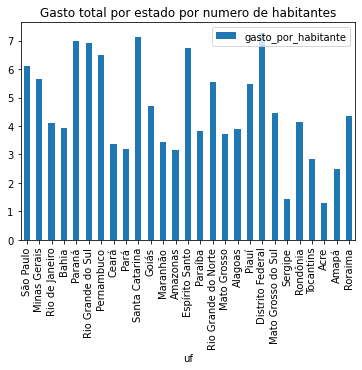

In [20]:
datasus_jul_2020.plot(kind='bar', y='gasto_por_habitante')
plt.title('Gasto total por estado por numero de habitantes')
plt.show()

Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

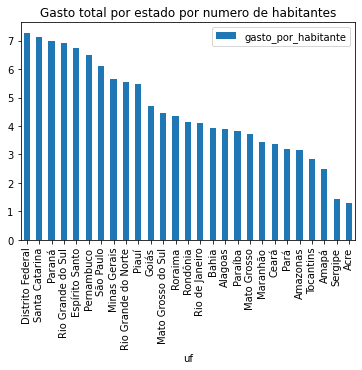

In [21]:
datasus_jul_2020.sort_values(by='gasto_por_habitante', ascending=False).plot(kind='bar', y='gasto_por_habitante')
plt.title('Gasto total por estado por numero de habitantes')
plt.show()

In [22]:
datasus_jul_2020.head()

,populacao,2020/Jul,gasto_por_habitante
uf,,,
São Paulo,46289333,282709570.31,6.11
Minas Gerais,21331292,120467187.34,5.65
Rio de Janeiro,17366189,71540227.33,4.12
Bahia,14930634,58898100.40,3.94
Paraná,11516840,80320852.69,6.97


In [23]:
datasus_jul_2020['populacao'] / 1000000

uf
São Paulo             46.29
Minas Gerais          21.33
Rio de Janeiro        17.37
Bahia                 14.93
Paraná                11.52
Rio Grande do Sul     11.42
Pernambuco             9.62
Ceará                  9.19
Pará                   8.69
Santa Catarina         7.28
Goiás                  7.14
Maranhão               7.13
Amazonas               4.23
Espírito Santo         4.06
Paraíba                4.04
Rio Grande do Norte    3.53
Mato Grosso            3.53
Alagoas                3.35
Piauí                  3.28
Distrito Federal       3.06
Mato Grosso do Sul     2.81
Sergipe                2.32
Rondônia               1.80
Tocantins              1.59
Acre                   0.89
Amapá                  0.86
Roraima                0.63
Name: populacao, dtype: float64

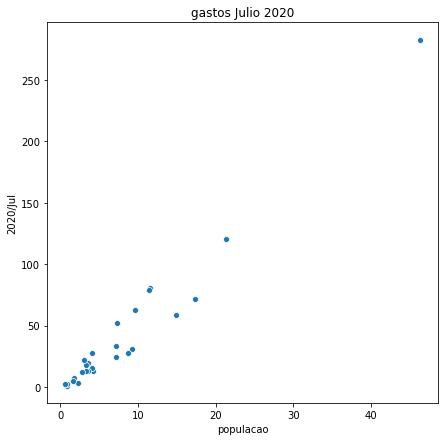

In [24]:
plt.figure(figsize=(7,7))
plt.title('gastos Julio 2020')
sns.scatterplot(data = datasus_jul_2020 / 1000000, x='populacao',y='2020/Jul')
plt.show()

Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [25]:
datasus_jun_2020 = get_data_from_ibge_join_cols(datasus_T.iloc[-3])

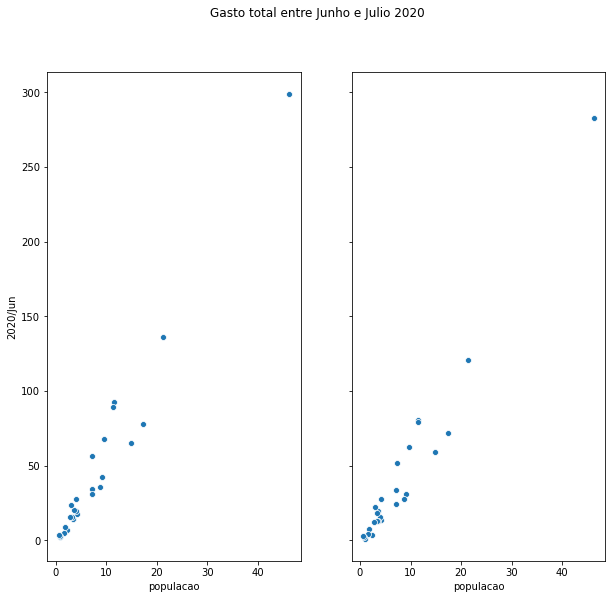

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,9),sharey=True)
fig.suptitle('Gasto total entre Junho e Julio 2020')
sns.scatterplot(ax=ax1, x='populacao',y='2020/Jun',data=datasus_jun_2020 / 1000000)
sns.scatterplot(ax=ax2, x='populacao',y='2020/Jul', data=datasus_jul_2020  / 1000000)
plt.show()

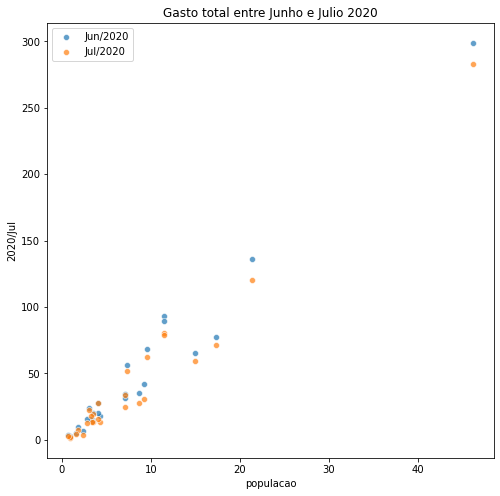

In [27]:
plt.figure(figsize=(8,8))
plt.title('Gasto total entre Junho e Julio 2020')
sns.scatterplot(x='populacao',y='2020/Jun',data=datasus_jun_2020 / 1000000, label='Jun/2020',alpha=.7)
sns.scatterplot(x='populacao',y='2020/Jul', data=datasus_jul_2020  / 1000000, label='Jul/2020',alpha=.7)
plt.show()

### Conclusão:
Pelos gráficos fica difícil tirar até o momento uma conclusão certa de tenência ou gasto por habitante, já que os dados são carregados com retroatividade. `Analise não conclusivo`

In [28]:
datasus_T.head()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2009/Jan,3147566.24,2152239.30,8607222.74,1186281.36,25397157.43,1702307.43,6022437.54,16509174.38,12411956.66,32123065.16,...,13448667.55,60870400.36,192321557.36,60381593.99,32082203.52,61522380.02,9771575.46,10039582.41,20817880.66,13150489.00
2009/Fev,3082108.12,2086775.61,8385962.92,1106225.18,23045700.70,1617603.91,5984209.71,15323800.01,10896197.27,28875478.53,...,11902752.05,40657841.56,178596376.79,57239101.63,29845655.79,52101637.77,9648706.17,9326576.40,20201261.16,12358825.51
2009/Mar,4190355.33,2476364.26,9207129.28,1422690.18,28225957.76,1863376.50,6640964.62,19000528.61,13754374.44,36018826.32,...,14490295.47,52749369.57,216951591.57,69070488.20,34921069.20,65111965.49,11784290.10,11680730.78,24174119.21,14445518.57
2009/Abr,4040251.62,2396887.63,8160517.20,1377859.19,27478025.61,1899215.36,6461045.18,17947811.13,12570578.13,35445605.90,...,14203837.61,48895602.42,215053018.45,64054678.26,33677499.55,61590828.91,11240770.37,11102643.47,22943952.73,14434211.04
2009/Mai,3946423.71,2610261.80,8562322.43,1363883.01,26610951.91,1929012.06,6622397.84,18274483.44,12936419.98,34894016.82,...,15160988.21,51167129.65,212890248.16,68685542.95,34053483.16,64402291.62,11155445.90,11495694.05,23781906.69,14622167.93


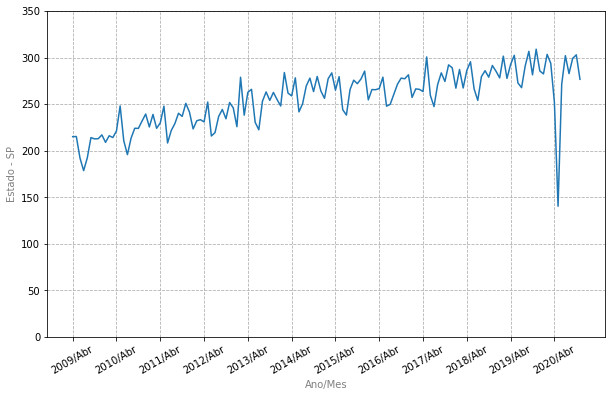

In [29]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_T / 1000000, x=datasus_T.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(0,350)
# locators: https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
# tick.AutoLocator coloca o ticks automaticamente
#ax.xaxis.set_major_locator(tick.AutoLocator())
ax.xaxis.set_major_locator(tick.IndexLocator(base=12,offset=0))
ax.yaxis.set_major_locator(tick.AutoLocator())

plt.xlabel('Ano/Mes',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.ylabel('Estado - SP',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.grid(linestyle='--')
plt.show()

## Convert index to date 

In [30]:
meses_dict = {'Jan':1,'Fev':2,'Mar':3,'Abr':4,'Mai':5,'Jun':6,'Jul':7,'Ago':8,'Set':9,'Out':10,'Nov':11,'Dez':12}
def convert_data(data,meses_dict=meses_dict):
    ano = data[:4]
    mes = meses_dict.get(data[5:],0)
    return date(int(ano),int(mes),1)

In [31]:
datasus_T.index = datasus_T.index.map(convert_data)

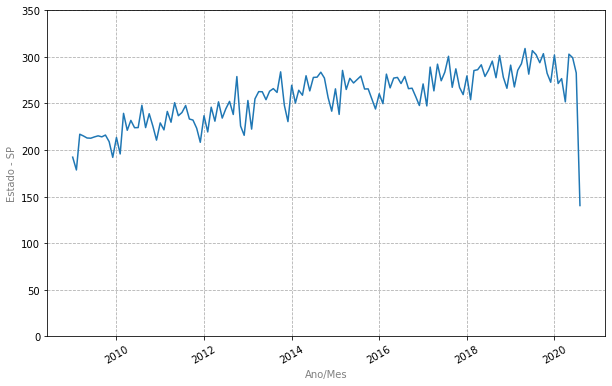

In [32]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_T / 1000000, x=datasus_T.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.xlabel('Ano/Mes',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.ylabel('Estado - SP',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.grid(linestyle='--')
plt.show()
plt.show()

# Melt

In [33]:
#Copiamos o dataframe
datasus_melt = datasus_T.copy()

In [34]:
datasus_melt.reset_index(inplace=True)
datasus_melt = datasus_melt.melt(id_vars=['index'])
datasus_melt.columns = ['mes','uf','gasto']
datasus_melt.head()

,mes,uf,gasto
0,2009-01-01,Rondônia,3147566.24
1,2009-02-01,Rondônia,3082108.12
2,2009-03-01,Rondônia,4190355.33
3,2009-04-01,Rondônia,4040251.62
4,2009-05-01,Rondônia,3946423.71


In [35]:
# Voltar Atras.
datasus_melt.pivot(index='mes',columns='uf').head()

gasto                                                \
uf               Acre     Alagoas      Amapá   Amazonas       Bahia   
mes                                                                   
2009-01-01 2152239.30 10121881.47 1702307.43 8607222.74 43856594.59   
2009-02-01 2086775.61  8994586.40 1617603.91 8385962.92 41094717.03   
2009-03-01 2476364.26 12040996.68 1863376.50 9207129.28 51476930.68   
2009-04-01 2396887.63 11651218.51 1899215.36 8160517.20 49585513.41   
2009-05-01 2610261.80 11471079.17 1929012.06 8562322.43 50686984.15   

                                                                    \
uf               Ceará Distrito Federal Espírito Santo       Goiás   
mes                                                                  
2009-01-01 32123065.16      13150489.00    13448667.55 20817880.66   
2009-02-01 28875478.53      12358825.51    11902752.05 20201261.16   
2009-03-01 36018826.32      14445518.57    14490295.47 24174119.21   
2009-04-01 35445605.90      14434211.04    14203837.61 22943952.73   
2009-05-01 34894016.82      14622167.93    15160988.21 23781906.69   

                        ...                                                    \
uf            Maranhão  ...       Piauí Rio Grande do Norte Rio Grande do Sul   
mes                     ...                                                     
2009-01-01 16509174.38  ... 12411956.66         10207998.29       61522380.02   
2009-02-01 15323800.01  ... 10896197.27         10721328.37       52101637.77   
2009-03-01 19000528.61  ... 13754374.44         12298227.11       65111965.49   
2009-04-01 17947811.13  ... 12570578.13         11640067.28       61590828.91   
2009-05-01 18274483.44  ... 12936419.98         12397524.20       64402291.62   

                                                                           \
uf         Rio de Janeiro   Rondônia    Roraima Santa Catarina    Sergipe   
mes                                                                         
2009-01-01    60870400.36 3147566.24 1186281.36    32082203.52 5037054.40   
2009-02-01    40657841.56 3082108.12 1106225.18    29845655.79 4983217.59   
2009-03-01    52749369.57 4190355.33 1422690.18    34921069.20 6504862.57   
2009-04-01    48895602.42 4040251.62 1377859.19    33677499.55 5772732.46   
2009-05-01    51167129.65 3946423.71 1363883.01    34053483.16 6111674.22   

                                    
uf            São Paulo  Tocantins  
mes                                 
2009-01-01 192321557.36 6022437.54  
2009-02-01 178596376.79 5984209.71  
2009-03-01 216951591.57 6640964.62  
2009-04-01 215053018.45 6461045.18  
2009-05-01 212890248.16 6622397.84  

[5 rows x 27 columns]

In [36]:
datasus_melt['gasto(M)'] = datasus_melt['gasto'] / 1000000

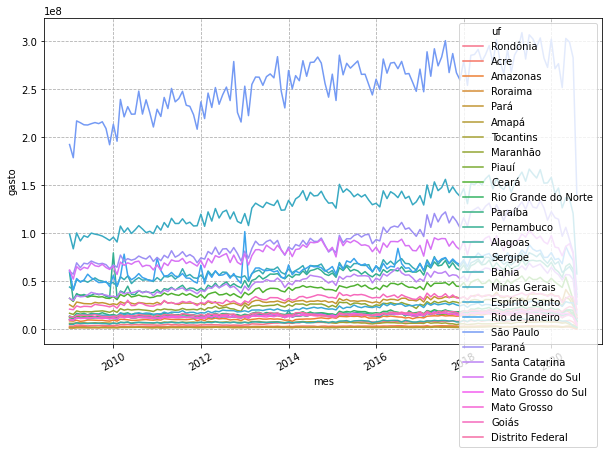

In [37]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_melt, x='mes', y='gasto',hue='uf')
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

### Melhorar o grafico
- Muitos estados, escolhero estado
- Palete de cores: https://seaborn.pydata.org/tutorial/color_palettes.html
- Posiçao da Legenda
- titulos do eixo e titulo


In [38]:
datasus_estados = datasus_melt[datasus_melt['uf'].isin(['Pará','Santa Catarina','Goiás','Maranhão'])]

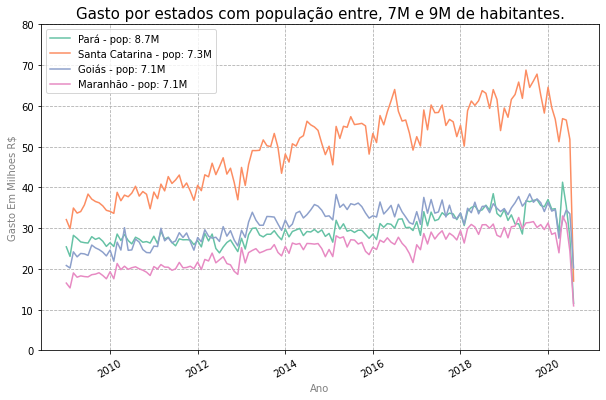

In [39]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_estados, x='mes', y='gasto(M)',hue='uf',palette="Set2",hue_order=['Pará','Santa Catarina','Goiás','Maranhão'])
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.ylim(0,80)
plt.xlabel('Ano',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.ylabel('Gasto Em Milhoes R$',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.legend(['Pará - pop: 8.7M','Santa Catarina - pop: 7.3M','Goiás - pop: 7.1M','Maranhão - pop: 7.1M'])
plt.title("Gasto por estados com população entre, 7M e 9M de habitantes.",fontdict={'fontfamily':'sans-serif','fontsize':15,'color':'black'})
plt.show()

In [40]:
datasus_melt.head()

,mes,uf,gasto,gasto(M)
0,2009-01-01,Rondônia,3147566.24,3.15
1,2009-02-01,Rondônia,3082108.12,3.08
2,2009-03-01,Rondônia,4190355.33,4.19
3,2009-04-01,Rondônia,4040251.62,4.04
4,2009-05-01,Rondônia,3946423.71,3.95


In [41]:
datasus_melt['data'] = datasus_melt['mes'].astype('datetime64')
datasus_melt['mes'] = datasus_melt['data'].dt.month
datasus_melt['ano'] = datasus_melt['data'].dt.year
datasus_melt.head()

,mes,uf,gasto,gasto(M),data,ano
0,1,Rondônia,3147566.24,3.15,2009-01-01,2009
1,2,Rondônia,3082108.12,3.08,2009-02-01,2009
2,3,Rondônia,4190355.33,4.19,2009-03-01,2009
3,4,Rondônia,4040251.62,4.04,2009-04-01,2009
4,5,Rondônia,3946423.71,3.95,2009-05-01,2009


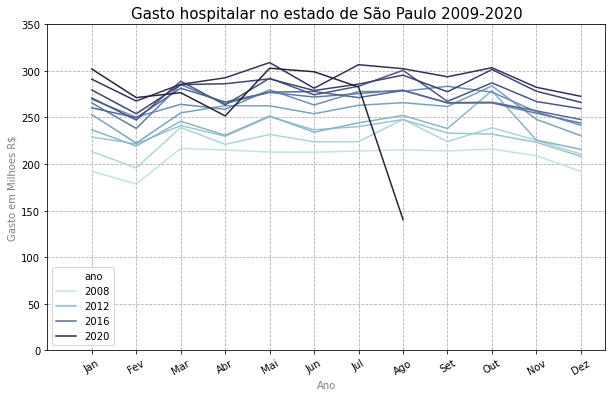

In [59]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_melt.query("uf == 'São Paulo'"), x='mes', y='gasto(M)',hue='ano',palette="ch:start=.2,rot=-.3")
plt.xticks(np.arange(12),meses_dict,rotation=30)
plt.grid(linestyle='--')
plt.ylim(0,350)
ax.xaxis.set_major_locator(tick.IndexLocator(base=1,offset=0))
plt.xlabel('Ano',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.ylabel('Gasto em Milhoes R$',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.title(f"Gasto hospitalar no estado de São Paulo {datasus_melt['ano'].min()}-{datasus_melt['ano'].max()}",fontdict={'fontfamily':'sans-serif','fontsize':15,'color':'black'})
plt.show()

# get gasto diario 

In [61]:
dias_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [69]:
datasus_melt['mes'].map(dias_mes)

0       31
1       28
2       31
3       30
4       31
        ..
3775    30
3776    31
3777    30
3778    31
3779    31
Name: mes, Length: 3780, dtype: int64

In [73]:
datasus_melt['gasto_diario'] = datasus_melt['gasto(M)'] / datasus_melt['mes'].map(dias_mes)

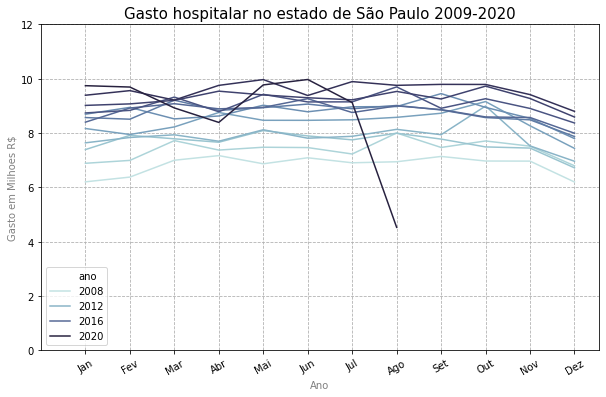

In [75]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=datasus_melt.query("uf == 'São Paulo'"), x='mes', y='gasto_diario',hue='ano',palette="ch:start=.2,rot=-.3")
plt.xticks(np.arange(12),meses_dict,rotation=30)
plt.grid(linestyle='--')
plt.ylim(0,12)
ax.xaxis.set_major_locator(tick.IndexLocator(base=1,offset=0))
plt.xlabel('Ano',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.ylabel('Gasto em Milhoes R$',fontdict={'fontfamily':'sans-serif','fontsize':10,'color':'grey'})
plt.title(f"Gasto hospitalar no estado de São Paulo {datasus_melt['ano'].min()}-{datasus_melt['ano'].max()}",fontdict={'fontfamily':'sans-serif','fontsize':15,'color':'black'})
plt.show()